In [1]:
from numpy import uint8, uint16
from pandas import concat, read_csv

UINT8_ONE = uint8(1)
CATEGORY_MAP = {"2": UINT8_ONE, "D": UINT8_ONE, "S": uint8(2)}
UINT8_ZERO = uint8(0)
UINT16_ZERO = uint16(0)
convert_category = lambda value: CATEGORY_MAP.get(value.replace(" ", ""), UINT8_ZERO)
convert_numeric = lambda value: uint16(value.replace(" ", "").replace(",", "")) if value else UINT16_ZERO
CSV_KEYS = "DE", "DR", "V"
CONVERTERS = {
    "T": convert_category,
    "R": convert_category,
    "E": convert_numeric,
    "A": convert_numeric,
    "DE": convert_numeric,
    "DA": convert_numeric,
    "H": convert_numeric,
    "M": convert_numeric
}
df = concat(
    (read_csv(f"R/{key}.csv", index_col=0, converters=CONVERTERS) for key in CSV_KEYS), keys=CSV_KEYS, names=("RE",)
)
df

T  R   E  A  DE    DA     H     M
RE I                                     
DE 1    0  0   0  0   8  2947  1425  4611
   1    0  1   1  0   3  1818     0   650
   1    0  1   2  0   7  4735   487   308
   1    0  2   1  0   3  2078  2748     0
   1    0  2   1  1   3   269  5848   189
...    .. ..  .. ..  ..   ...   ...   ...
V  467  1  0   7  2   4  6453     0  9665
   467  1  1  10  0   5  6272    62  1417
   467  1  1   6  1   7  5267    78    76
   467  1  2   5  1   6  4602  8211   716
   467  1  2   2  5   7  1979  7396   329

[9110 rows x 8 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       9110 non-null   uint8 
 1   R       9110 non-null   uint8 
 2   E       9110 non-null   uint16
 3   A       9110 non-null   uint16
 4   DE      9110 non-null   uint16
 5   DA      9110 non-null   uint16
 6   H       9110 non-null   uint16
 7   M       9110 non-null   uint16
dtypes: uint16(6), uint8(2)
memory usage: 171.3+ KB


In [3]:
from math import floor, log10

result = df.iloc[:, :2]
for col in df.columns.to_list()[2:]:
    for digit_index in range(floor(log10(df[col].max())), -1, -1):
        result[f"{col}{digit_index}"] = (df[col].to_numpy() // 10 ** digit_index % 10).astype(uint8)
result[10:20]

T  R  E1  E0  A1  A0  DE1  DE0  DA4  DA3  ...  H4  H3  H2  H1  H0  M4  \
RE I                                            ...                           
DE 2  0  0   2   3   0   9    1    0    1    0  ...   0   0   1   6   3   0   
   2  0  1   2   2   0   3    0    4    0    7  ...   0   0   0   0   0   0   
   2  0  1   2   1   0   2    1    1    1    1  ...   0   1   3   0   4   0   
   2  0  2   0   0   2   8    1    0    0    0  ...   1   1   7   2   6   0   
   2  0  2   1   7   1   4    0    7    0    3  ...   0   9   8   0   5   0   
   2  1  2   1   3   1   4    0    7    0    3  ...   0   8   4   7   3   0   
   2  1  2   1   8   2   0    0    7    0    5  ...   1   1   9   2   2   0   
   2  1  1   3   2   0   3    0    6    1    0  ...   0   0   2   4   8   0   
   2  1  1   2   4   0   1    0    7    0    8  ...   0   0   0   0   0   0   
   2  1  0   2   6   1   2    0    8    0    9  ...   0   0   0   0   0   0   

      M3  M2  M1  M0  
RE I                  
DE 2   5   7   8   9  
   2   0   3   4   0  
   2   0   2   3   1  
   2   0   0   0   0  
   2   0   6   6   6  
   2   0   3   1   6  
   2   0   4   6   9  
   2   1   2   8   1  
   2   0   0   0   0  
   2   6   9   4   3  

[10 rows x 23 columns]

In [4]:
reshaped = result.to_numpy().T.reshape(23, -1, 10)
reshaped_tuple = tuple(reshaped)
len(reshaped_tuple), reshaped_tuple[0].shape

(23, (911, 10))

2025-12-25 07:40:46.644629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766648446.882631      36 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766648446.946360      36 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766648447.468447      36 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766648447.468483      36 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766648447.468486      36 computation_placer.cc:177] computation placer alr

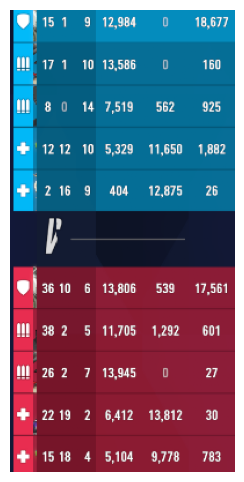

[[0 0 1 5 0 1 0 9 1 2 9 8 4 0 0 0 0 0 1 8 6 7 7]
 [0 1 1 7 0 1 1 0 1 3 5 8 6 0 0 0 0 0 0 0 1 6 0]
 [0 1 0 8 0 0 1 4 0 7 5 1 9 0 0 5 6 2 0 0 9 2 5]
 [0 2 1 2 1 2 1 0 0 5 3 2 9 1 1 6 5 0 0 1 8 8 2]
 [0 2 0 2 1 6 0 9 0 0 4 0 4 1 2 8 7 5 0 0 0 2 6]
 [1 0 3 6 1 0 0 6 1 3 8 0 6 0 0 5 3 9 1 7 5 6 1]
 [1 1 3 8 0 2 0 5 1 1 7 0 5 0 1 2 9 2 0 0 6 0 1]
 [1 1 2 6 0 2 0 7 1 3 9 4 5 0 0 0 0 0 0 0 0 2 7]
 [1 2 2 2 1 9 0 2 0 6 4 1 2 1 3 8 1 2 0 0 0 3 0]
 [1 2 1 5 1 8 0 4 0 5 1 0 4 0 9 7 7 8 0 0 7 8 3]]


2025-12-25 07:40:55.554541: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
from pathlib import Path
from tensorflow.random import shuffle
import tensorflow as tf
from tensorflow import gather
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
from matplotlib.pyplot import figure, axis, imshow, show
from numpy import array

image_paths = sorted(map(str, Path().rglob("*.png")))

data_count = len(image_paths)
indices = shuffle(tf.range(data_count))
X_shuffled = gather(image_paths, indices)
y_shuffled = tuple(gather(y, indices) for y in reshaped_tuple)

train_size = int(data_count * .9)
train_X = X_shuffled[:train_size]
val_X = X_shuffled[train_size:]

train_y = tuple(y[:train_size] for y in y_shuffled)
val_y = tuple(y[train_size:] for y in y_shuffled)


def preprocess_image(path, label):
    image = decode_png(read_file(path), channels=3)[230:930, 530:1370]
    hud_parts = [
        image[:, :40], image[:, 390:420], image[:, 450:480],
        image[:, 500:530], image[:, 570:640], image[:, 670:740], image[:, 770:]
    ]
    cropped = tf.concat(hud_parts, axis=1)
    resized = resize(cropped, (400, 194)) / 255
    return resized, label


def make_dataset(X, y, shuffle=False, batch_size=32):
    ds = Dataset.from_tensor_slices((X, y))
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds


train_ds = make_dataset(train_X, train_y, shuffle=True)
val_ds = make_dataset(val_X, val_y, shuffle=False)
for x_batch, y_batch in train_ds.take(1):
    figure(figsize=(6, 6))
    axis("off")
    imshow(x_batch[0])
    show()
    print(array(y_batch).reshape(23, -1).T.reshape(-1, 10, 23)[0])

In [6]:
from tensorflow.keras import layers, models

In [7]:
class LearnablePositionalEncoding2D(tf.keras.layers.Layer):
    def __init__(self, height, width, channels):
        super().__init__()
        self.pe = self.add_weight((1, height, width, channels), "random_normal")

    def call(self, x):
        return x + self.pe

In [8]:
def transformer_block(x, num_heads=8, key_dim=64, ff_dim=512, dropout=0.1):
    attn = layers.MultiHeadAttention(num_heads, key_dim)(x, x)
    attn = layers.Dropout(dropout)(attn)
    x = layers.LayerNormalization()(x + attn)

    ffn = layers.Dense(ff_dim, "relu")(x)
    ffn = layers.Dense(x.shape[-1])(ffn)
    ffn = layers.Dropout(dropout)(ffn)

    return layers.LayerNormalization()(x + ffn)

In [9]:
image_size = tuple(x_batch.shape[1:])
image_size

(400, 194, 3)

In [10]:
def build_model(image_size=image_size):  # (400, 194, 3)
    inputs = layers.Input(shape=image_size)

    # CNN Backbone (Transfer Learning)
    backbone = tf.keras.applications.ResNet50V2(False, input_tensor=inputs)

    x = backbone.output  # (H', W', C)
    x = layers.Conv2D(256, 1, activation="relu")(x)

    # Resize to grid size
    x = layers.Resizing(10, 23)(x)

    # Positional Encoding
    x = LearnablePositionalEncoding2D(10, 23, 256)(x)

    # Flatten for Transformer
    x = layers.Reshape((10 * 23, 256))(x)

    # Transformer Encoder
    for _ in range(4):
        x = transformer_block(x)

    # Restore grid
    x = layers.Reshape((10, 23, 256))(x)

    outputs = []

    # Column 1 (2 classes)
    col1 = layers.Dense(2)(x[:, :, 0, :])
    outputs.append(col1)

    # Column 2 (4 classes)
    col2 = layers.Dense(3)(x[:, :, 1, :])
    outputs.append(col2)

    # Column 3~23 (shared 10 classes)
    shared_head = layers.Dense(10)
    for i in range(2, 23):
        outputs.append(shared_head(x[:, :, i, :]))

    model = models.Model(inputs, outputs)
    return model

In [68]:
from numpy import unique

weights = []
for y in reshaped_tuple:
    counts = unique(y, return_counts=True)[1]
    r = 1 / counts
    s = sum(r)
    w = r / s * len(counts)
    weights.append(w)
weights

[array([0.98770582, 1.01229418]),
 array([1.47251996, 0.76352887, 0.76395117]),
 array([0.01998877, 0.01603975, 0.02908918, 0.11577494, 0.55661027,
        5.26249709]),
 array([0.85506614, 0.94217267, 0.97459151, 1.00373212, 0.97880141,
        0.99820496, 1.01044605, 1.02183777, 1.1231352 , 1.09201217]),
 array([5.31532436e-04, 1.76715838e-03, 5.34885953e-03, 2.15998531e-02,
        1.88398719e-01, 3.39117694e+00, 3.39117694e+00]),
 array([0.35526845, 0.57606614, 0.6742652 , 0.73452723, 0.93157295,
        1.00772333, 1.15573269, 1.3748493 , 1.46179629, 1.72819842]),
 array([0.00843089, 0.0359399 , 2.95562921]),
 array([1.06153984, 1.09649298, 1.12250218, 1.0159596 , 0.96472559,
        0.82036884, 0.86788055, 0.88496481, 0.97624782, 1.18931779]),
 array([0.02538282, 0.08388888, 2.8907283 ]),
 array([0.87060599, 0.91124631, 0.80664963, 0.76452693, 0.85037894,
        0.95379093, 1.00164361, 1.15889372, 1.34113197, 1.34113197]),
 array([0.85687669, 0.9981201 , 0.99702447, 1.01145801, 

가중치를 바탕으로 비율 학습

In [11]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

clear_session()
model = build_model()
model.compile(AdamW(), [SparseCategoricalCrossentropy(True)] * 23, metrics=[SparseCategoricalAccuracy] * 23)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 194,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 406, 200,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 200, 97,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 202, 99,   │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 100, 49,   │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 100, 49,   │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 100, 49,   │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 100, 49,   │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 100, 49,   │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 100, 49,   │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 102, 51,   │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 100, 49,   │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 100, 49,   │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 100, 49,   │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 100, 49,   │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 100, 49,   │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 100, 49,   │          0 │ conv2_block1_0_c

 Total params: 27,312,400 (104.19 MB)

 Trainable params: 27,266,960 (104.02 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_ds,
    epochs=256,
    callbacks=EarlyStopping(patience=16, verbose=1, restore_best_weights=True),
    validation_data=val_ds
)

Epoch 1/256


I0000 00:00:1766648575.771889     117 service.cc:152] XLA service 0x719548024520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766648575.771967     117 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-12-25 07:42:56.831035: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-25 07:42:58.583581: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2025-12-25 07:42:58.584619: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy_1/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2025-12-25 07:42:58.588458: W tensorflow/compiler/tf2xla/kernels/assert_op.c

25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - dense_10_loss: 2.4451 - dense_10_sparse_categorical_accuracy: 0.2590 - dense_10_sparse_categorical_accuracy_1: 0.1137 - dense_10_sparse_categorical_accuracy_10: 0.1116 - dense_10_sparse_categorical_accuracy_11: 0.5792 - dense_10_sparse_categorical_accuracy_12: 0.4373 - dense_10_sparse_categorical_accuracy_13: 0.3465 - dense_10_sparse_categorical_accuracy_14: 0.3349 - dense_10_sparse_categorical_accuracy_15: 0.3382 - dense_10_sparse_categorical_accuracy_16: 0.7006 - dense_10_sparse_categorical_accuracy_17: 0.5267 - dense_10_sparse_categorical_accuracy_18: 0.3416 - dense_10_sparse_categorical_accuracy_19: 0.3133 - dense_10_sparse_categorical_accuracy_2: 0.4834 - dense_10_sparse_categorical_accuracy_20: 0.3189 - dense_10_sparse_categorical_accuracy_3: 0.1782 - dense_10_sparse_categorical_accuracy_4: 0.5430 - dense_10_sparse_categorical_accuracy_5: 0.0933 - dense_10_sparse_categorical_accuracy_6: 0.5019 - dense_10_sparse_categorical_accuracy_7: 0.

2025-12-25 07:44:00.846260: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_231', 428 bytes spill stores, 340 bytes spill loads

2025-12-25 07:44:00.880493: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_231', 432 bytes spill stores, 344 bytes spill loads

2025-12-25 07:44:01.094667: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9', 2916 bytes spill stores, 2888 bytes spill loads

2025-12-25 07:44:01.287170: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_225', 428 bytes spill stores, 340 bytes spill loads

2025-12-25 07:44:01.484508: I extern

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dense_10_loss: 2.4356 - dense_10_sparse_categorical_accuracy: 0.2615 - dense_10_sparse_categorical_accuracy_1: 0.1138 - dense_10_sparse_categorical_accuracy_10: 0.1116 - dense_10_sparse_categorical_accuracy_11: 0.5834 - dense_10_sparse_categorical_accuracy_12: 0.4404 - dense_10_sparse_categorical_accuracy_13: 0.3484 - dense_10_sparse_categorical_accuracy_14: 0.3367 - dense_10_sparse_categorical_accuracy_15: 0.3398 - dense_10_sparse_categorical_accuracy_16: 0.7059 - dense_10_sparse_categorical_accuracy_17: 0.5302 - dense_10_sparse_categorical_accuracy_18: 0.3432 - dense_10_sparse_categorical_accuracy_19: 0.3148 - dense_10_sparse_categorical_accuracy_2: 0.4880 - dense_10_sparse_categorical_accuracy_20: 0.3203 - dense_10_sparse_categorical_accuracy_3: 0.1791 - dense_10_sparse_categorical_accuracy_4: 0.5476 - dense_10_sparse_categorical_accuracy_5: 0.0933 - dense_10_sparse_categorical_accuracy_6: 0.5066 - dense_10_sparse_categorical_accuracy_7: 0.119

2025-12-25 07:44:56.662943: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_85', 432 bytes spill stores, 344 bytes spill loads

2025-12-25 07:44:56.724066: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_85', 428 bytes spill stores, 340 bytes spill loads

2025-12-25 07:44:57.050967: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_85', 540 bytes spill stores, 416 bytes spill loads

2025-12-25 07:44:57.277681: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 236 bytes spill stores, 236 bytes spill loads

2025-12-25 07:44:57.522157: I external/l

26/26 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - dense_10_loss: 2.4268 - dense_10_sparse_categorical_accuracy: 0.2638 - dense_10_sparse_categorical_accuracy_1: 0.1138 - dense_10_sparse_categorical_accuracy_10: 0.1117 - dense_10_sparse_categorical_accuracy_11: 0.5873 - dense_10_sparse_categorical_accuracy_12: 0.4432 - dense_10_sparse_categorical_accuracy_13: 0.3502 - dense_10_sparse_categorical_accuracy_14: 0.3383 - dense_10_sparse_categorical_accuracy_15: 0.3413 - dense_10_sparse_categorical_accuracy_16: 0.7109 - dense_10_sparse_categorical_accuracy_17: 0.5334 - dense_10_sparse_categorical_accuracy_18: 0.3448 - dense_10_sparse_categorical_accuracy_19: 0.3162 - dense_10_sparse_categorical_accuracy_2: 0.4922 - dense_10_sparse_categorical_accuracy_20: 0.3217 - dense_10_sparse_categorical_accuracy_3: 0.1799 - dense_10_sparse_categorical_accuracy_4: 0.5519 - dense_10_sparse_categorical_accuracy_5: 0.0933 - dense_10_sparse_categorical_accuracy_6: 0.5110 - dense_10_sparse_categorical_accuracy_7: 0.1